# 0. Load data

In [39]:
import DataPreparation

In [40]:
DataA = DataPreparation.dataA 
DataA_startID = DataPreparation.dataA_startID
print(DataA_startID)

510


In [41]:
DataA[40]

,caption,mean,precision,votes,not_funny,somewhat_funny,funny
rank,,,,,,,
0,Long time no sea.,1.968085,0.021724,1410,492,471,447
1,Long time no sea.,1.912377,0.027572,913,360,273,280
2,"Noah, trust me. Its over.",1.685246,0.047111,305,166,69,70
3,Do I LOOK like I have any Grey Poupon?,1.658147,0.044848,313,170,80,63
4,I'm losing confidence in Google Maps too.,1.652597,0.042629,308,158,99,51
...,...,...,...,...,...,...,...
5432,"Say, you look familiar. How long have you had ...",1.000000,0.016807,60,60,0,0
5433,let me chuch your bengis,1.000000,0.016807,60,60,0,0
5434,No news is good news.,1.000000,0.016807,60,60,0,0


In [42]:
DataC = DataPreparation.dataC

In [43]:
DataC.head()

,num_captions,num_votes,image_locations,image_descriptions,image_uncanny_descriptions,entities,questions,date
0,3905.0,41185.0,[the street],[A man is relaxing on a city street. Others ar...,[A man is just laying in the middle of the sid...,[https://en.wikipedia.org/wiki/Bystander_effec...,[Why is he laying there?],NaT
1,3325.0,28205.0,"[the front hard, a residential walkway]",[A man in a winter coat and cap is looking at ...,[It's unusual to see someone holding a snow sh...,"[https://en.wikipedia.org/wiki/Snowball_fight,...",[Is the man overly small or the shovel overly ...,NaT
2,4399.0,21574.0,"[yoga place, a yoga studio]",[A man and woman are standing facing one anoth...,[Nothing is really out of place in this image....,"[https://en.wikipedia.org/wiki/Rug, https://en...","[Why is the man carrying a huge rug?, Why is t...",2016-03-21
3,4141.0,16894.0,"[a workplace, an elevator]",[Three business men are walking down a hall. T...,[A suit case is usually carried by one person ...,[https://en.wikipedia.org/wiki/Worker_cooperat...,[Why is the briefcase big enough for three peo...,2016-03-27
4,3951.0,95790.0,[plains],[Some cowboys are riding through the desert. T...,[There are rocking horses in place of real hor...,"[https://en.wikipedia.org/wiki/Rocking_horse, ...",[Why is this chase taking place?],2016-04-03


In [44]:
import pandas as pd

def concat_with_source(list_of_dfs, source_col="image_index", source_values=None, ignore_index=True):
  if not isinstance(list_of_dfs, (list, tuple)):
      raise TypeError("list_of_dfs doit être une liste ou tuple de DataFrame")
  if len(list_of_dfs) == 0:
      return pd.DataFrame()  # empty

  n = len(list_of_dfs)
  if source_values is None:
      src_vals = list(range(n))
  elif isinstance(source_values, (list, tuple)):
      if len(source_values) != n:
          raise ValueError("source_values must have same length as list_of_dfs")
      src_vals = list(source_values)
  else:
      src_vals = [source_values] * n

  # évite de muter les df originaux: on travaille sur des copies légères via assign (qui renvoie un nouveau df view/copy)
  parts = []
  for val, df in zip(src_vals, list_of_dfs):
      if not isinstance(df, pd.DataFrame):
          raise TypeError("Tous les éléments de list_of_dfs doivent être des pandas.DataFrame")
      # si le nom de colonne existe déjà, on choisit de préfixer pour éviter collision
      if source_col in df.columns:
          new_col = source_col + "_from_list"
      else:
          new_col = source_col
      parts.append(df.assign(**{new_col: val}))
  result = pd.concat(parts, ignore_index=ignore_index)
  return result

data_full = concat_with_source(DataA)

In [45]:
data_full


,caption,mean,precision,votes,not_funny,somewhat_funny,funny,image_index
0,I'm a congressman--obstruction is my job.,1.913043,0.094022,69,24,27,18,0
1,"I'm what they mean when they say, 'The middle ...",1.842105,0.191381,19,8,6,5,0
2,Does this suit make me look flat?,1.711111,0.112915,45,21,16,8,0
3,"When the right woman comes along, I'll know it.",1.625000,0.116657,32,15,14,3,0
4,"I used to lie in the gutter, but then I quit d...",1.617647,0.133610,34,19,9,6,0
...,...,...,...,...,...,...,...,...
2292673,Looks like we took a wrong turn at the Hubble ...,1.023256,0.016347,86,84,2,0,383
2292674,Post-modern just doesn't do it for me.,1.022222,0.015625,90,88,2,0,383
2292675,How was I supposed to know they covered themse...,1.020833,0.014654,96,94,2,0,383
2292676,"No, they wanted us to teleport the giveaway ca...",1.020619,0.020619,97,96,0,1,383


# 1. Statistiques descriptives de base





### 1.1 Distribution du nombre de captions par cartoon (histogramme).

The following part present : 
- the distribution of caption number across cartoon
- the 5 maximum and 5 minimum number along with their dates



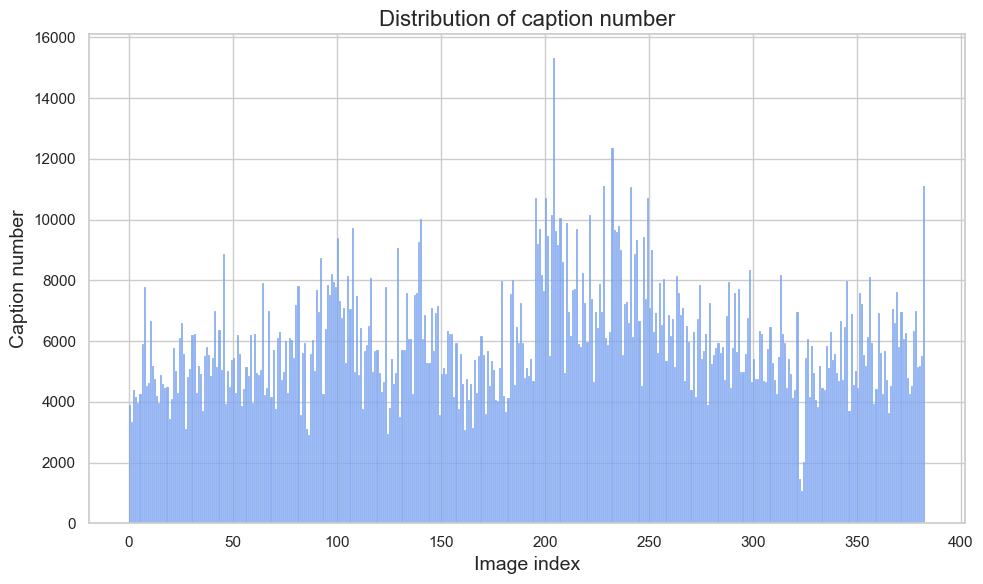

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_full['image_index'], bins=383,  color='cornflowerblue')
plt.title("Distribution of caption number", fontsize=16)
plt.xlabel("Image index", fontsize=14)
plt.ylabel("Caption number", fontsize=14)
plt.tight_layout()
plt.show()

In [38]:
caption_counts = data_full['image_index'].value_counts()
catpion_nbr_sorted = caption_counts.sort_values(ascending=True)

max_caption_nbr_df = catpion_nbr_sorted.head(5).reset_index().rename(columns={'count': 'nbr_caption'})
min_caption_nbr_df = catpion_nbr_sorted.tail(5).reset_index().rename(columns={'count': 'nbr_caption'})

print(max_caption_nbr_df)
print(min_caption_nbr_df)

   image_index  nbr_caption
0          323         1066
1          322         1444
2          324         2032
3           86         2919
4          124         2930
   image_index  nbr_caption
0          195        10718
1          241        11069
2          228        11108
3          232        12354
4          204        15329


### 1.2 Distribution du nombre de votes par cartoon.


In [21]:
votes_df = data_full.groupby("image_index").sum().reset_index()
votes_df


,image_index,caption,mean,precision,votes,not_funny,somewhat_funny,funny
0,0,I'm a congressman--obstruction is my job.I'm w...,4256.683304,472.465048,41185,37038,3438,709
1,1,I'm hourly.And one day your son will keep you ...,3693.707284,508.497363,28205,24656,2950,599
2,2,"We're pretentious, not ostentatious.Broga meet...",4933.580858,inf,21574,18549,2416,609
3,3,"I'm just saying, I can see why the 'brief'case...",4878.707828,inf,16894,13813,2424,657
4,4,"No, you grow upSheriff, I feel like we're just...",5123.267319,433.603330,95790,65884,22267,7639
...,...,...,...,...,...,...,...,...
379,379,"Sorry, only the catcher works from home.Yes, I...",6103.645842,182.949060,928856,713048,165126,50682
380,380,"Yes, it's called Thesaurus, but you're not rel...",6256.508346,214.781240,788251,596652,141107,50492
381,381,The seller isn't willing to come down.Accordin...,6716.227335,216.245215,1085745,786848,215129,83768
382,382,See how the nose seems to follow you?It’s like...,7203.534397,231.996265,878676,705740,128594,44343


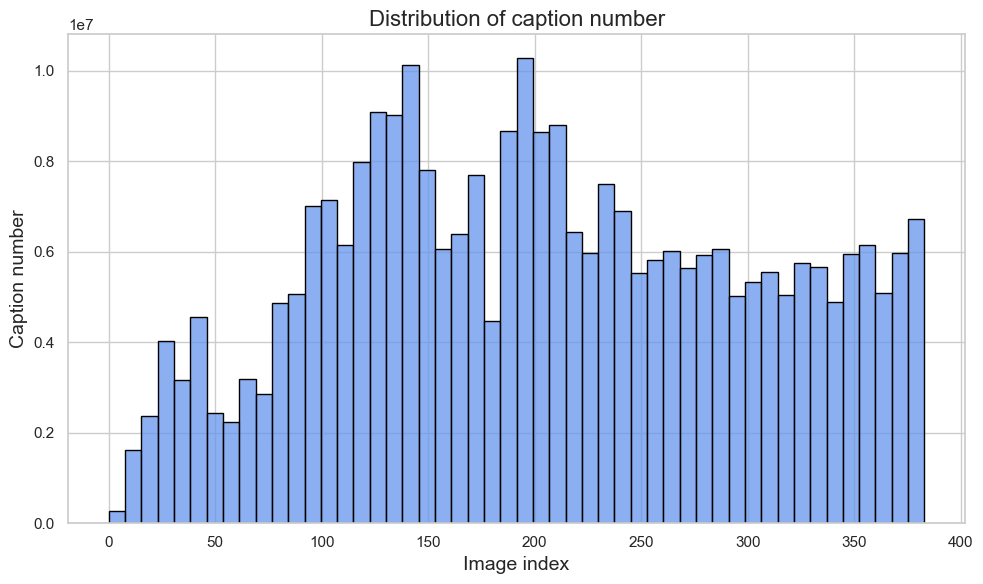

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(
    x="image_index",
    weights="votes",
    data=votes_df,
    bins=50,
    color="cornflowerblue",
    edgecolor="black"
)
plt.title("Distribution of the numbre of votes per cartoon", fontsize=16)
plt.xlabel("Image index", fontsize=14)
plt.ylabel("Votes number", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
test =0

### 1.3 Répartition des scores moyens (mean) des captions (courbe de densité).



### 1.4 Corrélation entre nombre de captions et nombre total de votes par cartoon.


### 1.5 Proportion des votes selon les catégories not_funny, somewhat_funny, funny (pie chart global + par cartoon).
